In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd

from utils_devo import *
import model_env as me
import tab_agents as tab

In [2]:
traj_df = pd.read_pickle('./traj_df.pkl')

In [2]:
import pickle
fnames=[
    # First worm
    'Data/traj12-11-2020_19-04-41.pkl', #none
    'Data/traj12-11-2020_19-14-38.pkl', #none
    'Data/traj12-11-2020_19-24-30.pkl', #xlim 800
    'Data/traj12-11-2020_19-35-31.pkl', #none # Seems like an especially bad dataset. Actually ruined all the others

    # Second worm
    'Data/traj12-11-2020_19-55-19.pkl', #none
    'Data/traj12-11-2020_20-05-11.pkl', #none
    'Data/traj12-11-2020_20-15-17.pkl', #none
    'Data/traj12-11-2020_20-25-06.pkl', #xlim 1430

    # Third worm
    'Data/traj30-10-2020_18-14-00.pkl', #none
    'Data/traj30-10-2020_18-34-10.pkl', #none

    # Fourth worm
    'Data/traj02-11-2020_15-53-56.pkl', #none 
    'Data/traj02-11-2020_16-14-45.pkl', #none 

    # Fifth worm
    'Data/traj03-11-2020_14-46-45.pkl', #none
    'Data/traj03-11-2020_15-08-07.pkl', #none
]

all_dict = {}
for fn in fnames:
    with open(fn,'rb') as f:
        new_dict = pickle.load(f)
    for key,val in new_dict.items():
        if key in all_dict:
            all_dict[key] = all_dict[key]+val
        else:
            all_dict[key] = val

# xlims = [1e6, 1e6, 800, 1e6, 1e6, 1e6, 1e6, 1430, 1e6, 1e6, 1e6, 1e6, 1e6, 1e6]

# traj_df = make_df(fnames,xlimit=xlims,time_ahead=10,time_steps=5)

In [7]:
with open('all_dict.pkl','wb') as f:
    pickle.dump(all_dict,f)

In [10]:
gamma = 0.7
epsilon = 0.05
alpha = .01
runtime = 10000

In [11]:
dist_dict = make_dist_dict(traj_df,smoothenpars={'smooth_par':0.05,'iters':50})


'''
Running the script 
'''
worm = me.FakeWorm(dist_dict)
alph_mouse = tab.Q_Alpha_Agent(worm,gamma=gamma,epsilon=epsilon,alpha=alpha)

alpha_mouse_learned, rewards, eval_rewards = tab.learner(alph_mouse,worm,episodes=runtime)

Eval 0: average 1.645275243108012
Eval 1: average 0.07521715182717723
Eval 2: average 0.6200576259303527
Eval 3: average 1.6460594993089053
Eval 4: average 0.004465357791000061
Eval 5: average 0.03981133939759195
Eval 6: average 1.1535926559814886
Eval 7: average 0.0626797228820208
Eval 8: average 0.16739633397025525


KeyboardInterrupt: 

# With binned body angle

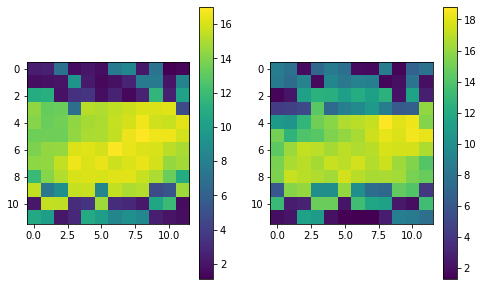

In [13]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches((8,5))
for i in range(2):
    im = ax[i].imshow(alph_mouse.Qtab[:,i].reshape(12,12))
    fig.colorbar(im,ax=ax[i])

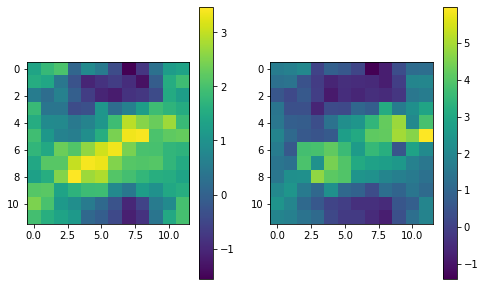

In [5]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches((8,5))
for i in range(2):
    im = ax[i].imshow(alph_mouse.Qtab[:,i].reshape(12,12))
    fig.colorbar(im,ax=ax[i])

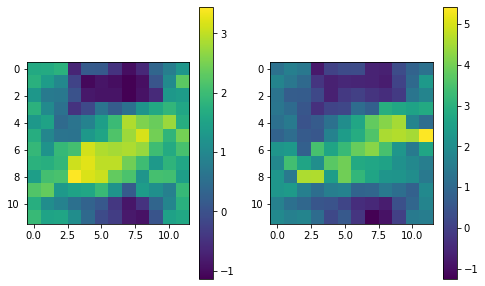

In [44]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches((8,5))
for i in range(2):
    im = ax[i].imshow(alph_mouse.Qtab[:,i].reshape(12,12))
    fig.colorbar(im,ax=ax[i])

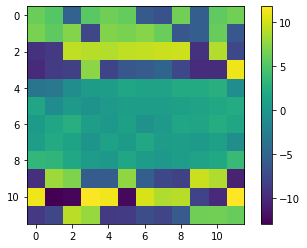

In [18]:
plt.imshow(alpha_mouse_learned.Qtab[:,1].reshape(12,12)-alpha_mouse_learned.Qtab[:,0].reshape(12,12))
plt.colorbar()

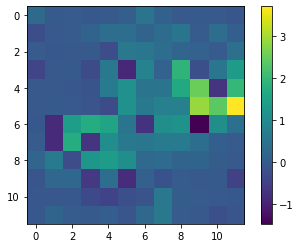

In [18]:
plt.imshow(alph_mouse.Qtab[:,1].reshape(12,12)-alph_mouse.Qtab[:,0].reshape(12,12))
plt.colorbar()

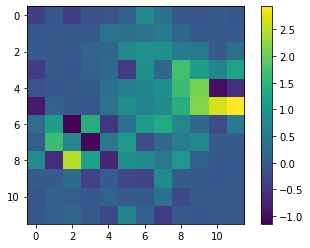

In [45]:
plt.imshow(alph_mouse.Qtab[:,1].reshape(12,12)-alph_mouse.Qtab[:,0].reshape(12,12))
plt.colorbar()

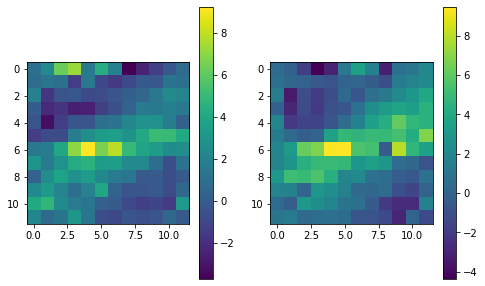

In [6]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches((8,5))
for i in range(2):
    im = ax[i].imshow(alph_mouse.Qtab[:,i].reshape(12,12))
    fig.colorbar(im,ax=ax[i])

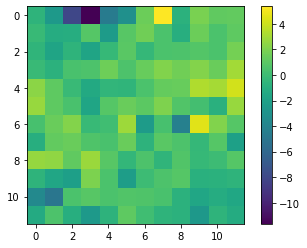

In [5]:
plt.imshow(alph_mouse.Qtab[:,1].reshape(12,12)-alph_mouse.Qtab[:,0].reshape(12,12))
plt.colorbar()

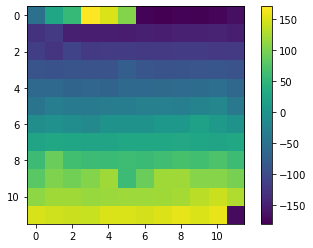

In [73]:
plt.imshow(dist_dict['body_off'][:,:,0])
plt.colorbar();

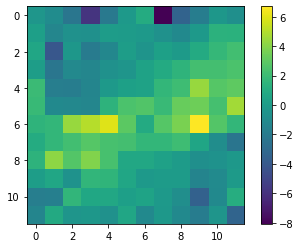

In [25]:
plt.imshow(dist_dict['reward_on'][:,:,0])
plt.colorbar();

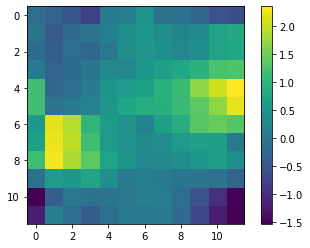

In [78]:
plt.imshow(dist_dict['reward_on'][:,:,0]-dist_dict['reward_off'][:,:,0])
plt.colorbar();

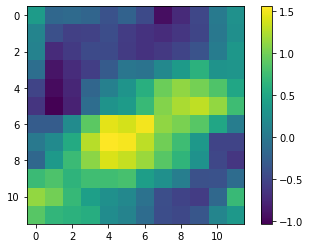

In [74]:
plt.imshow(dist_dict['reward_off'][:,:,0])
plt.colorbar();

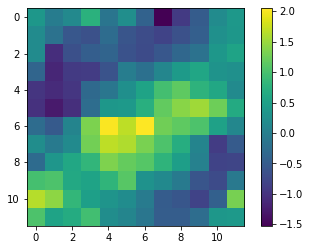

In [28]:
plt.imshow(dist_dict['reward_off'][:,:,0])
plt.colorbar();

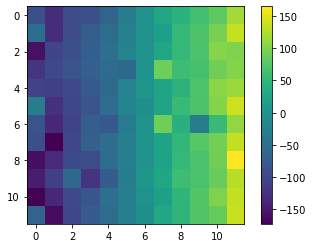

In [66]:
plt.imshow(dist_dict['head_on'][:,:,0])
plt.colorbar();

In [5]:
dist_dict['head_on'][1,2]

array([ -92.96296296, 2653.4430727 ])

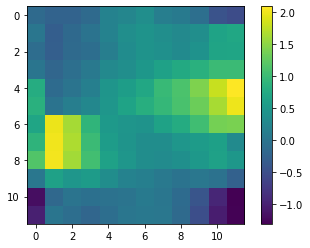

In [41]:
plt.imshow(dist_dict['reward_on'][:,:,0]-dist_dict['reward_off'][:,:,0])
plt.colorbar();

# Not optimistic exploration

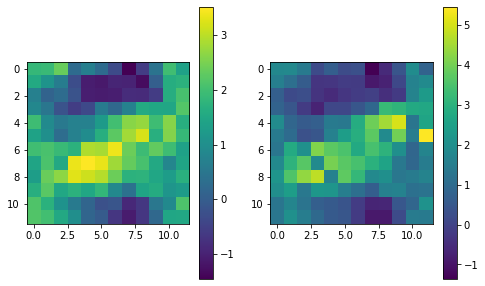

In [5]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches((8,5))
for i in range(2):
    im = ax[i].imshow(alph_mouse.Qtab[:,i].reshape(12,12))
    fig.colorbar(im,ax=ax[i])

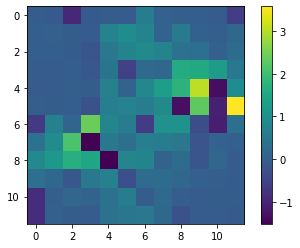

In [9]:
diffs = alph_mouse.Qtab[:,1].reshape(12,12)-alph_mouse.Qtab[:,0].reshape(12,12)
plt.imshow(diffs)
plt.colorbar()

In [7]:
boltz = np.zeros(144)
for i in range(144):
    boltz[i] = np.exp(alph_mouse.Qtab[i,1]) / (np.exp(alph_mouse.Qtab[i,1]) + np.exp(alph_mouse.Qtab[i,0]))

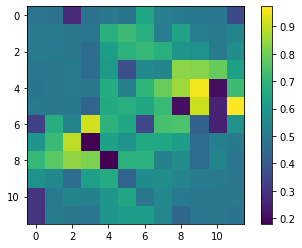

In [8]:
plt.imshow(boltz.reshape(12,12))
plt.colorbar();